In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Training Function

In [78]:
def mylinridgereg(X, Y, L):

    A = np.matmul(X.T,X)
    I = np.identity(A.shape[0])
    A = np.linalg.inv(A + (L*I))
    B = np.matmul(X.T,Y)

    W = np.matmul(A,B)
    return W

### Testing Function

In [79]:
def mylinridgeregeval(X, weights):
    return np.matmul(X,weights.T)

### Error Function

In [80]:
def meansquarederr(T, Tdash):
    dif = T - Tdash
    dif = np.sum(dif**2)
    dif = dif/len(T)
    return dif

## Data Reading

In [81]:
data = pd.read_csv('linregdata')

In [82]:
print data.head()

   M  0.455  0.365  0.095   0.514  0.2245   0.101   0.15  15
0  M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070   7
1  F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.210   9
2  M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.155  10
3  I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.055   7
4  I  0.425  0.300  0.095  0.3515  0.1410  0.0775  0.120   8


## Purifying Training data

In [83]:
data.replace(['M','F','I'],[2,0,1]).head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [84]:
maleInds = data.index[data['M'] == 'M'].tolist()
infInds = data.index[data['M'] == 'I'].tolist()
fmaleInds = data.index[data['M'] == 'F'].tolist()

data.insert(0,'M0',0)
data.insert(0,'M1',0)
data.insert(0,'M2',0)

data.loc[maleInds,'M0'] = 1
data.loc[infInds,'M1'] = 1
data.loc[fmaleInds,'M2'] = 1

data_labels = data['15']
data = data.drop(columns = ['M','15'], axis = 1)
data.head()

,M2,M1,M0,0.455,0.365,0.095,0.514,0.2245,0.101,0.15
0,0,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
1,1,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
2,0,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
3,0,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055
4,0,1,0,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120


## Partitioning training and testing data

In [85]:
train_data = data[:int(len(data)*0.8)]
train_labels = data_labels[:int(len(data)*0.8)]

In [86]:
X = train_data.values
Y = train_labels.values

mean = X.mean(axis=0)
var = np.sqrt(X.var(axis=0))

print var
X = (X - mean)/var

[0.46649925 0.46293457 0.48249653 0.12065867 0.09975317 0.04276304
 0.49155255 0.22183472 0.10965847 0.14114667]


In [88]:
O = np.ones(len(X))
X = np.vstack((X.T,O)).T

train_data = train_data.values
train_data = np.vstack((train_data.T,O)).T

## Purifying test data

In [87]:
mean_test = test_data.mean(axis=0)
var_test = np.sqrt(test_data.var(axis=0))

test_data = (test_data - mean_test)/var_test

test_data = data[int(len(data)*0.8):]
test_data_labels = data_labels[int(len(data)*0.8):]

In [89]:
O = np.ones(len(test_data))
test_data = np.vstack((test_data.T,O)).T

## Finding weights

In [139]:
A = np.linalg.inv(np.matmul(X.T,X))
B = np.matmul(X.T,Y)
W = np.matmul(A,B)

In [140]:
print W

[-4.78125    -5.15625    -4.96875    -0.21694217  1.30690708  0.3940476
  4.52074642 -4.45934683 -1.18947951  1.28557401 10.03862275]


#### Check for standardization

In [141]:
print "data variance = ", X.var(axis = 0)
print
print "data mean = ", X.mean(axis = 0)

data variance =  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]

data mean =  [-8.50949384e-18 -3.40379754e-17  7.87128180e-17 -7.65854446e-17
 -5.95664569e-16 -2.89322791e-16  1.87208865e-16  1.78699371e-16
  1.19132914e-16  1.19132914e-16  1.00000000e+00]


# Test on training data

In [142]:
weights = mylinridgereg(X, Y, 104)
T = mylinridgeregeval(X, weights)
Td = train_labels.values
print len(X)
print 
print "weights = ",weights
print 
print "MSE on training data = ",meansquarederr(T, Td)

3340

weights =  [ 0.15778086 -0.2993829   0.13469535  0.18404594  0.79293886  0.45427169
  0.77852508 -2.26513788 -0.35736399  2.14587319  9.735482  ]

MSE on training data =  5.313366230161058


### Varying the regularization parameter

[ 0.13204566  0.27462805  0.13582609  0.16222493  1.23957211  0.39796398
  3.64924956  4.04703661  0.9925815   1.58029764 10.02361734]

least error =  5.015093820723444

the best(target) variable for the training data =  0.005005005005005003


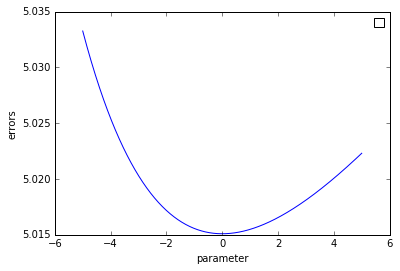

In [146]:
errors1 = []
L = np.linspace(-5,5,1000)
for i in (L):
    weights = mylinridgereg(X, Y, i)
    T = mylinridgeregeval(X, weights)
    Td = train_labels.values
    errors1.append( meansquarederr(T, Td) )

plt.xlabel("parameter")
plt.ylabel("errors")
plt.legend("lambda v errors")
plt.plot(L,errors1)

print np.abs(weights)
weights = np.asarray(weights)

best_variable = L[np.argmin(errors1)]

print
print "least error = ", errors1[np.argmin(errors1)]
print 
print 'the best(target) variable for the training data = ', best_variable

## Test on testing data

### varying the regularization parameter 

[ 1.21162609  0.5263744   1.41292271  4.68946745  3.99294111  5.19503291
  3.95056932 10.80243412  1.7797965   6.10267257  3.15092319]

least error =  3.6020507982466228

the best(target) variable for the testing data =  0.0030030030030028243


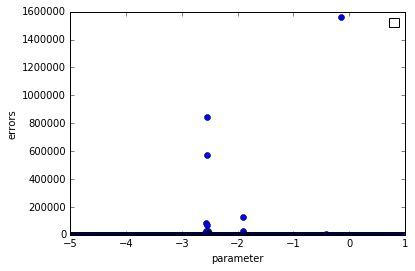

In [134]:
errors = []
L = np.linspace(-5,1,1000)
for i in ((L)):
    weights = mylinridgereg(test_data, test_data_labels, i)
    T = mylinridgeregeval(test_data, weights)
    Td = test_data_labels.values
    errors.append( meansquarederr(T, Td) )

plt.xlabel("parameter")
plt.ylabel("errors")
plt.legend("lambda v errors")
plt.plot(L,errors,'o')

print np.abs(weights)
weights = np.asarray(weights)

best_variable = L[np.argmin(errors)]

print
print "least error = ", errors[np.argmin(errors)]
print 
print 'the best(target) variable for the testing data = ', best_variable

### removing three unimportant parameters and plotting the graph

In [135]:
weights = np.abs(weights)
print weights

wsort = np.argsort(weights)
print wsort

significant_indexes = []
significant_indexes.append(np.argwhere(wsort == len(wsort)-1)[0][0])
significant_indexes.append(np.argwhere(wsort == len(wsort)-2)[0][0])
significant_indexes.append(np.argwhere(wsort == len(wsort)-3)[0][0])

L_significant_indexes = []
L_significant_indexes.append(np.argwhere(wsort == 0)[0][0])
L_significant_indexes.append(np.argwhere(wsort == 1)[0][0])
L_significant_indexes.append(np.argwhere(wsort == 2)[0][0])


[ 1.21162609  0.5263744   1.41292271  4.68946745  3.99294111  5.19503291
  3.95056932 10.80243412  1.7797965   6.10267257  3.15092319]
[ 1  0  2  8 10  6  4  3  5  9  7]


In [136]:
print 
print "significant attributes = ", significant_indexes
print
print "least significant attributes = ", L_significant_indexes


significant attributes =  [4, 9, 3]

least significant attributes =  [1, 0, 2]


## Plotting error curves after removing three insignificant attributes

[ 0.27046064  1.45198405  0.44552674  3.78104065  4.15383568  0.91130904
  1.55870795 10.02361734]

least error =  5.015093820723444

the best(target) variable for the training data =  0.005005005005005003


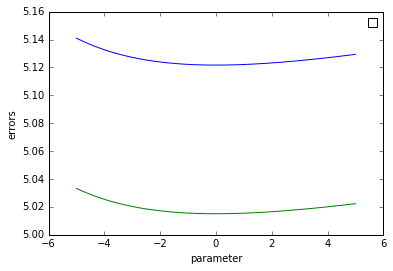

In [158]:
tempX = np.delete(X,L_significant_indexes,1)
errors = []
L = np.linspace(-5,5,1000)

for i in (L):
    weights = mylinridgereg(tempX, Y, i)
    T = mylinridgeregeval(tempX, weights)
    Td = train_labels.values
    errors.append( meansquarederr(T, Td) )

plt.xlabel("parameter")
plt.ylabel("errors")
plt.legend("lambda v errors")
plt.plot(L,errors,label = 'first')
plt.plot(L,errors1, label = 'second')

print np.abs(weights)
weights = np.asarray(weights)

best_variable = L[np.argmin(errors)]

print
print "least error = ", errors1[np.argmin(errors)]
print 
print 'the best(target) variable for the training data = ', best_variable

The error curve remained almost the same but the curve shifted slightly upward

meaning the total error increased by a little insignificant margin





# Partitioning the data

[0.05  0.275 0.5   0.725 0.95 ]

partition =  0.05


/home/saurav/.local/lib/python2.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in divide


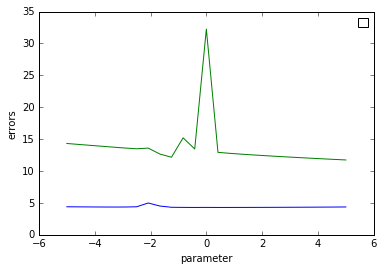


partition =  0.27499999999999997


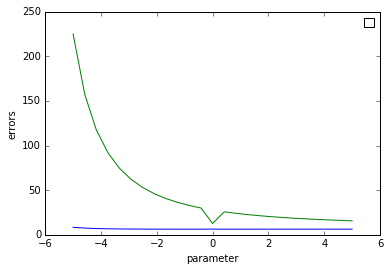


partition =  0.49999999999999994


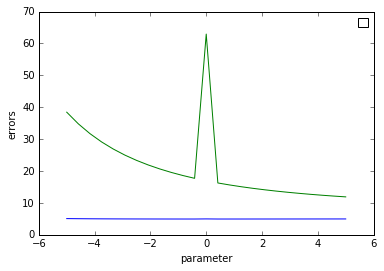


partition =  0.725


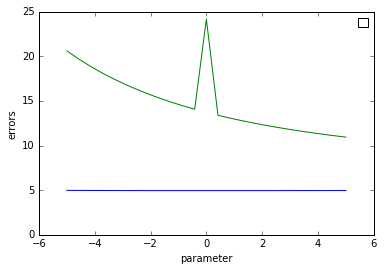


partition =  0.95


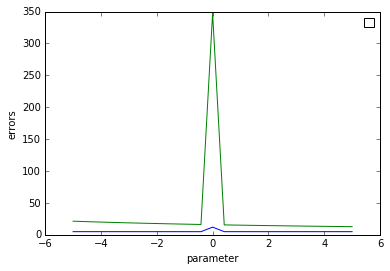

In [213]:
partitions = np.linspace(0.05,0.95,5)
print partitions

L = np.linspace(-5,5,25)
best_train_error = []
best_test_error = []
best_parameters_train = []
best_parameters_test = []

for pt in partitions:
    
    print ###################################
    print "partition = ", pt
    train_data = data[:int(len(data)*pt)]
    train_labels = data_labels[:int(len(data)*pt)]

    X = train_data.values
    Y = train_labels.values

    mean = X.mean(axis=0)
    var = np.sqrt(X.var(axis=0))
    X = (X - mean)/var

    O = np.ones(len(X))
    X = np.vstack((X.T,O)).T

    train_data = train_data.values
    train_data = np.vstack((train_data.T,O)).T

    mean_test = test_data.mean(axis=0)
    var_test = np.sqrt(test_data.var(axis=0))

    test_data = (test_data - mean_test)/var_test

    test_data = data[int(len(data)*pt):]
    test_data_labels = data_labels[int(len(data)*pt):]

    O = np.ones(len(test_data))
    test_data = np.vstack((test_data.T,O)).T

    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    #%%    Training data
    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

    errors1 = []
    for i in (L):
        weights = mylinridgereg(X, Y, i)
        T = mylinridgeregeval(X, weights)
        Td = train_labels.values
        errors1.append( meansquarederr(T, Td) )

    weights = np.asarray(weights)

    best_variable = L[np.argmin(errors1)]
    best_train_error.append(errors1[np.argmin(errors1)])
    best_parameters_train.append(L[np.argmin(errors1)])
    
    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    #%%    Testing data
    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

    errors = []
    for i in ((L)):
        weights = mylinridgereg(X, Y, i)
        T = mylinridgeregeval(test_data, weights)
        Td = test_data_labels.values
        errors.append( meansquarederr(T, Td) )

    plt.xlabel("parameter")
    plt.ylabel("errors")
    plt.grid
    plt.legend("lambda v errors")
    plt.plot(L,errors1, label = "train errors")
    plt.plot(L,errors, label = "test errors")
    plt.show()
    
    weights = np.asarray(weights)

    best_variable = L[np.argmin(errors)]
    best_test_error.append(errors[np.argmin(errors)])
    best_parameters_test.append(errors[np.argmin(errors)])



## minimum errors v partition graphs

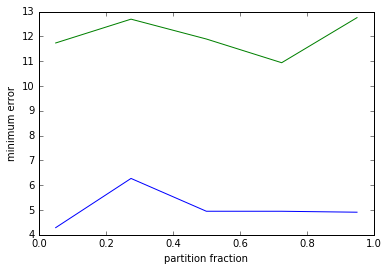

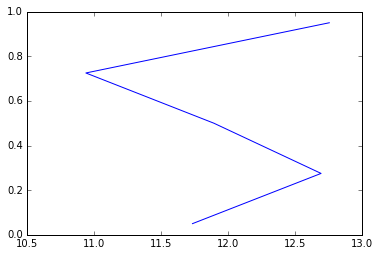

In [214]:
plt.xlabel("partition fraction")
plt.ylabel("minimum error")
plt.plot(partitions, best_train_error, label = "train error")
plt.plot(partitions, best_test_error, label = "test error")
plt.show()

plt.plot(best_parameters_test, partitions)

In [215]:
sum_errors = best_train_error + best_test_error
best_parameter = best_parameters_train[np.argmin(best_train_error)]
best_partition = partitions[np.argmin(best_train_error)]

best parameter =  0.41666666666666696
best partition =  0.05


/home/saurav/.local/lib/python2.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in divide


[]

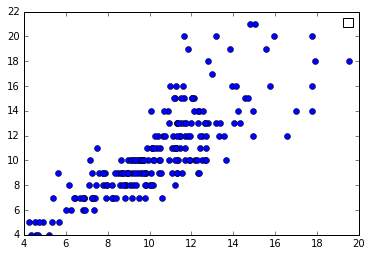

In [216]:
print "best parameter = ", best_parameter
print "best partition = ", best_partition


train_data = data[:int(len(data)*best_partition)]
train_labels = data_labels[:int(len(data)*best_partition)]

X = train_data.values
Y = train_labels.values

mean = X.mean(axis=0)
var = np.sqrt(X.var(axis=0))

#     print var
X = (X - mean)/var

O = np.ones(len(X))
X = np.vstack((X.T,O)).T

train_data = train_data.values
train_data = np.vstack((train_data.T,O)).T

mean_test = test_data.mean(axis=0)
var_test = np.sqrt(test_data.var(axis=0))

test_data = (test_data - mean_test)/var_test

test_data = data[int(len(data)*best_partition):]
test_data_labels = data_labels[int(len(data)*best_partition):]

O = np.ones(len(test_data))
test_data = np.vstack((test_data.T,O)).T


errors1 = []
for i in (L):
    weights = mylinridgereg(X, Y, i)
    T = mylinridgeregeval(X, weights)
    Td = train_labels.values
plt.legend("training data")
plt.plot(T,Td, 'o')

for i in ((L)):
    weights = mylinridgereg(X, Y, i)
    T = mylinridgeregeval(test_data, weights)
    Td = test_data_labels.values
#     errors.append( meansquarederr(T, Td) )
plt.plot()


the plot can be seen above

they all seem to be plotting to a line which is nearly at 45 degrees to the axes